In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

%config InlineBackend.figure_format = 'png2x'
plt.rcParams['figure.figsize'] = (4.5, 3)
plt.rcParams['font.size'] = 10

In [2]:
# Number of variables
num_vars = 5

# Correlation coefficient matrix
sigma = np.array([[ 1.        ,  0.94833644, -0.91082087, -0.09624682, -0.14217606],
                [ 0.94833644,  1.        , -0.78279493, -0.10840297, -0.178388  ],
                [-0.91082087, -0.78279493,  1.        , -0.08177872, -0.06798317],
                [-0.09624682, -0.10840297, -0.08177872,  1.        ,  0.9482886 ],
                [-0.14217606, -0.178388  , -0.06798317,  0.9482886 ,  1.        ]])

In [3]:
# Verify positive definite
eigs, _ = np.linalg.eig(sigma)
eigs

array([2.79412691, 1.9500799 , 0.19599205, 0.01449396, 0.04530718])

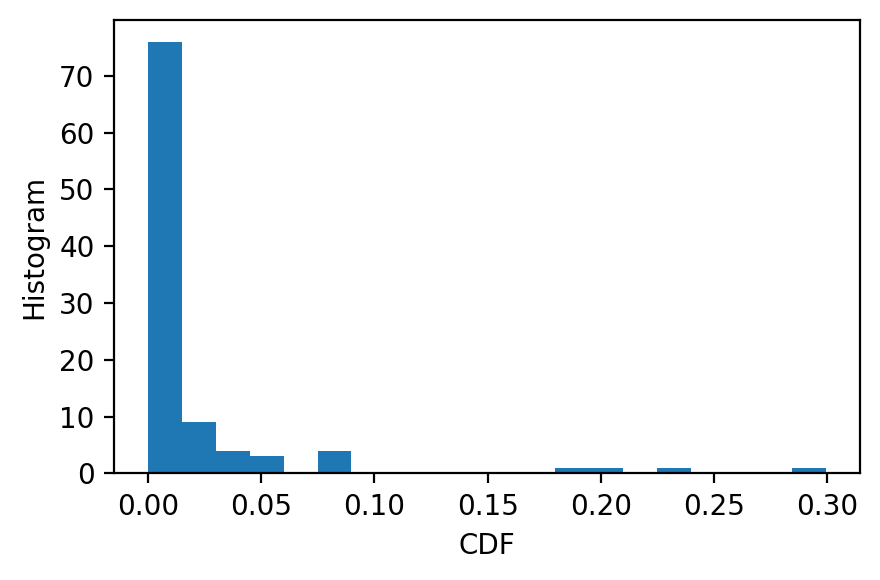

In [8]:
num_samples = 100

# Mean
mu = np.zeros(num_vars)

# Uniform variable
u = np.random.uniform(0, 1, size=(num_samples, num_vars))

# STD normal variable
std_x = stats.norm.ppf(u)

# CDF
cdf_x = stats.multivariate_normal.cdf(x=std_x, mean=mu, cov=sigma)

# Plot the histogram of CDFs
counts, bins, _ = plt.hist(cdf_x, bins=20)
plt.xlabel('CDF')
plt.ylabel('Histogram')
plt.tight_layout()
plt.show()
plt.close('all')

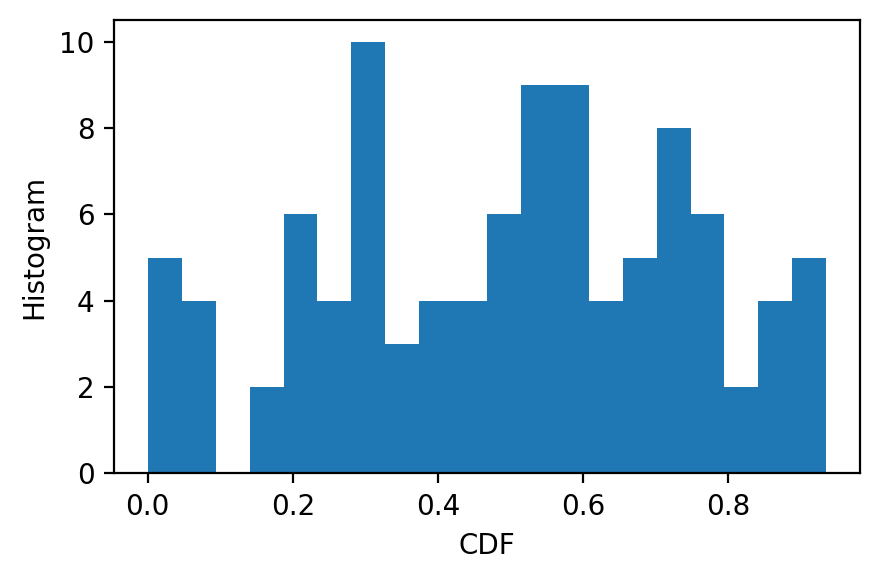

In [11]:
num_samples = 100


mu2 = (num_vars**0.25)*np.ones(num_vars)

# Uniform variable
u = np.random.uniform(0, 1, size=(num_samples, num_vars))

# STD normal variable
std_x = stats.norm.ppf(u)

# CDF
cdf_x = stats.multivariate_normal.cdf(x=std_x, mean=-mu2, cov=sigma)

# Plot the histogram of CDFs
counts, bins, _ = plt.hist(cdf_x, bins=20)
plt.xlabel('CDF')
plt.ylabel('Histogram')
plt.tight_layout()
plt.show()
plt.close('all')

## Define marginals

In [91]:
PDF1 = stats.norm(loc=10, scale=3)
PDF2 = stats.lognorm(s=0.6)
PDF3 = stats.weibull_min(c=2)
PDF4 = stats.weibull_max(c=2)
PDF5 = stats.expon(loc=0, scale=1)

## Genenrate samples using shifted Gaussian copula

In [120]:
num_samples = 1000

mu2 = (num_vars**0.25)*np.ones(num_vars)

# Uniform variable
u = np.random.uniform(0, 1, size=(num_samples, num_vars))

# STD normal variable
std_x = stats.norm.ppf(u)

# CDF
cdf_x = stats.multivariate_normal.cdf(x=std_x, mean=np.zeros(5), cov=sigma)

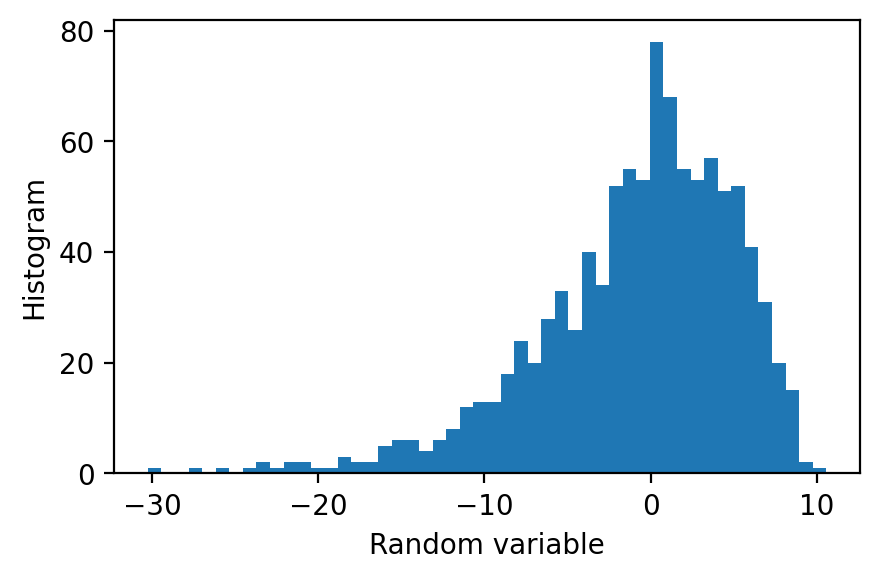

In [124]:
rv1 = PDF1.ppf(cdf_x)
_, _, _ = plt.hist(rv1, bins=50)
plt.xlabel('Random variable')
plt.ylabel('Histogram')
plt.tight_layout()
plt.show()
plt.close('all')

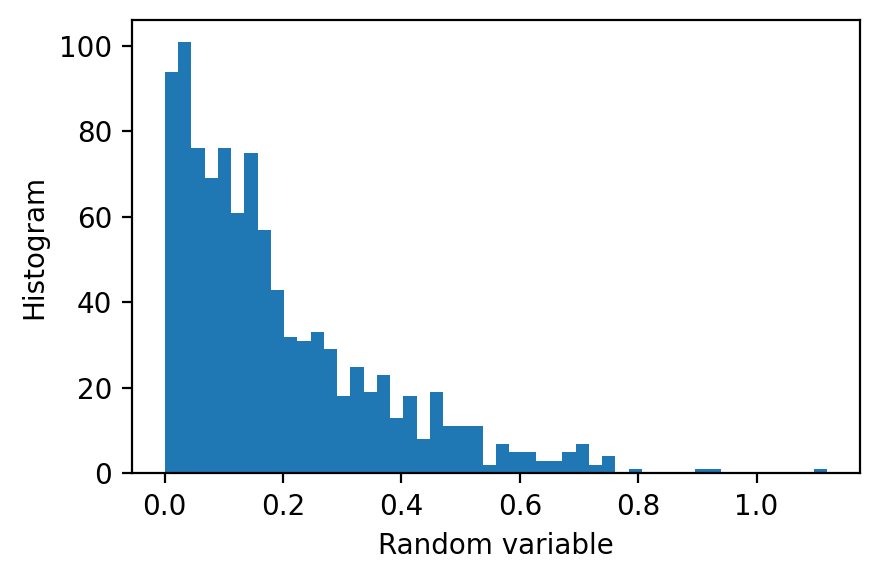

In [125]:
rv2 = PDF2.ppf(cdf_x)
_, _, _ = plt.hist(rv2, bins=50)
plt.xlabel('Random variable')
plt.ylabel('Histogram')
plt.tight_layout()
plt.show()
plt.close('all')

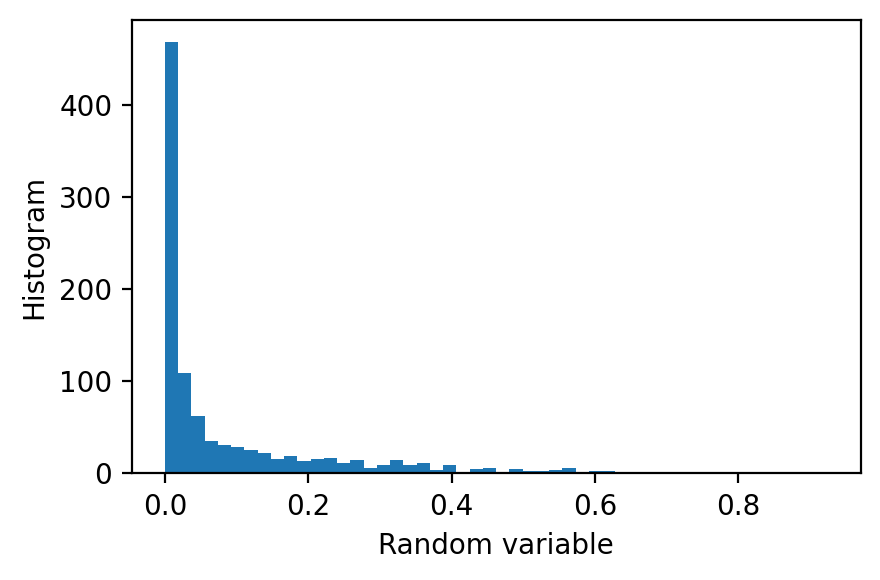

In [126]:
rv3 = PDF3.ppf(cdf_x)
_, _, _ = plt.hist(rv3, bins=50)
plt.xlabel('Random variable')
plt.ylabel('Histogram')
plt.tight_layout()
plt.show()
plt.close('all')

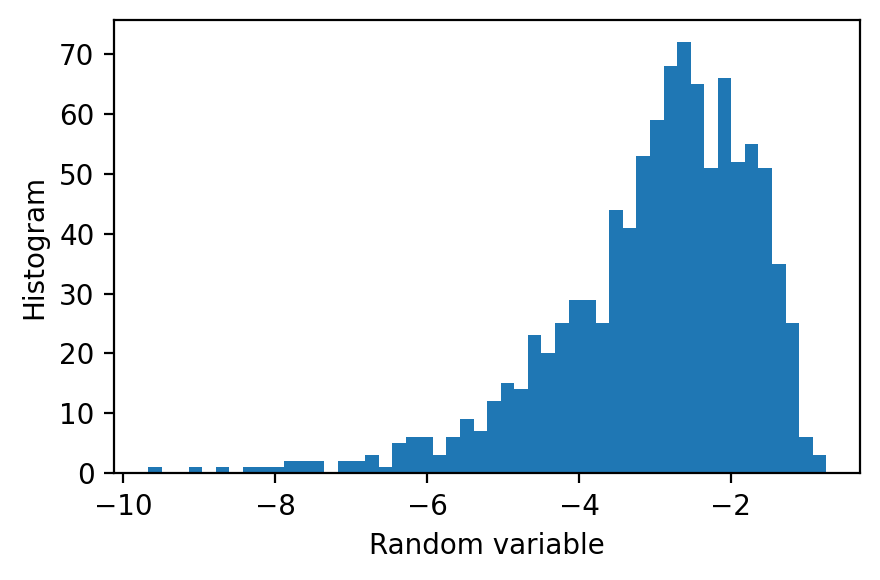

In [127]:
rv4 = PDF4.ppf(cdf_x)
_, _, _ = plt.hist(rv4, bins=50)
plt.xlabel('Random variable')
plt.ylabel('Histogram')
plt.tight_layout()
plt.show()
plt.close('all')

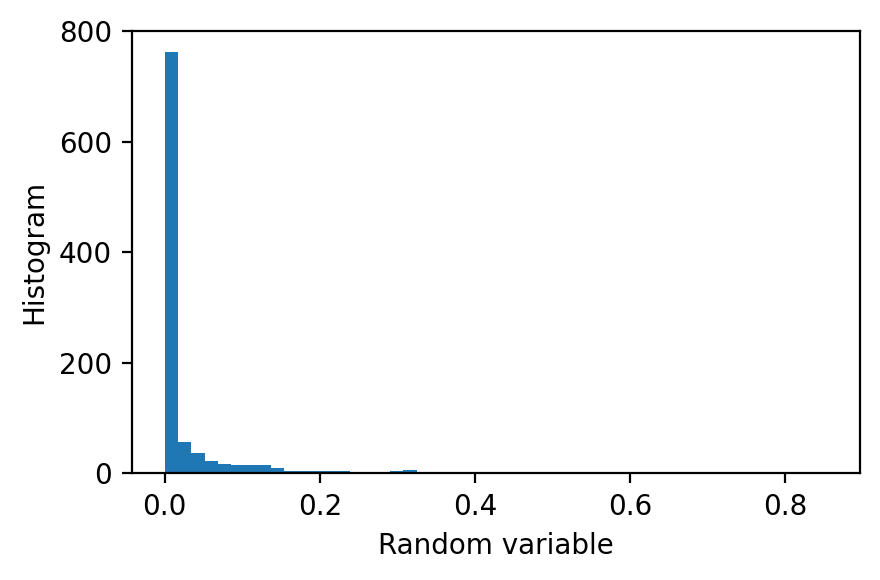

In [128]:
rv5 = PDF5.ppf(cdf_x)
_, _, _ = plt.hist(rv5, bins=50)
plt.xlabel('Random variable')
plt.ylabel('Histogram')
plt.tight_layout()
plt.show()
plt.close('all')

## Check the correlation coefficient

In [129]:
rv = np.concatenate([rv1.reshape(-1, 1), rv2.reshape(-1, 1), rv3.reshape(-1, 1), rv4.reshape(-1, 1), rv5.reshape(-1, 1)], axis=1)

In [131]:
new_sigma = np.corrcoef(rv, rowvar=False)
new_sigma

array([[1.        , 0.81384102, 0.6783657 , 0.99951454, 0.49307247],
       [0.81384102, 1.        , 0.97292275, 0.79550047, 0.84637066],
       [0.6783657 , 0.97292275, 1.        , 0.65612251, 0.91911246],
       [0.99951454, 0.79550047, 0.65612251, 1.        , 0.47052875],
       [0.49307247, 0.84637066, 0.91911246, 0.47052875, 1.        ]])

In [132]:
sigma

array([[ 1.        ,  0.94833644, -0.91082087, -0.09624682, -0.14217606],
       [ 0.94833644,  1.        , -0.78279493, -0.10840297, -0.178388  ],
       [-0.91082087, -0.78279493,  1.        , -0.08177872, -0.06798317],
       [-0.09624682, -0.10840297, -0.08177872,  1.        ,  0.9482886 ],
       [-0.14217606, -0.178388  , -0.06798317,  0.9482886 ,  1.        ]])

In [219]:
L = np.linalg.cholesky(sigma)

u = np.random.uniform(0, 1, size=(1000, 5))
std_x = stats.norm.ppf(q=u, loc=0, scale=1)
std_x_correlated = L@std_x.T
cdf = stats.norm.cdf(x=std_x_correlated.T, loc=0, scale=1)

In [220]:
# rv1 = stats.norm.ppf(q=cdf[:, 0], loc=0, scale=1)
# rv2 = stats.norm.ppf(q=cdf[:, 1], loc=1, scale=2)
# rv3 = stats.norm.ppf(q=cdf[:, 2], loc=2, scale=3)
# rv4 = stats.norm.ppf(q=cdf[:, 3], loc=3, scale=4)
# rv5 = stats.norm.ppf(q=cdf[:, 4], loc=4, scale=5)
rv1 = PDF1.ppf(cdf[:, 0])
rv2 = PDF2.ppf(cdf[:, 1])
rv3 = PDF3.ppf(cdf[:, 2])
rv4 = PDF4.ppf(cdf[:, 3])
rv5 = PDF5.ppf(cdf[:, 4])

In [221]:
rv = np.concatenate([rv1.reshape(-1, 1), rv2.reshape(-1, 1), rv3.reshape(-1, 1), rv4.reshape(-1, 1), rv5.reshape(-1, 1)], axis=1)

In [222]:
np.corrcoef(rv, rowvar=False)

array([[ 1.        ,  0.86307622, -0.89826446, -0.0984857 , -0.13326527],
       [ 0.86307622,  1.        , -0.66152754, -0.1002828 , -0.14511792],
       [-0.89826446, -0.66152754,  1.        , -0.07636661, -0.05661468],
       [-0.0984857 , -0.1002828 , -0.07636661,  1.        ,  0.78086391],
       [-0.13326527, -0.14511792, -0.05661468,  0.78086391,  1.        ]])

In [214]:
sigma

array([[ 1.        ,  0.94833644, -0.91082087, -0.09624682, -0.14217606],
       [ 0.94833644,  1.        , -0.78279493, -0.10840297, -0.178388  ],
       [-0.91082087, -0.78279493,  1.        , -0.08177872, -0.06798317],
       [-0.09624682, -0.10840297, -0.08177872,  1.        ,  0.9482886 ],
       [-0.14217606, -0.178388  , -0.06798317,  0.9482886 ,  1.        ]])

In [230]:
arr = np.random.randn(2, 3, 4)
arr

array([[[-0.76112463, -0.68850972,  0.67864077,  0.69322821],
        [-0.24295103,  0.13874923,  0.48702145, -0.18577495],
        [-1.61397734, -0.64753458,  0.43603952, -0.10781124]],

       [[ 1.63295723, -1.47052475, -0.51240676, -0.36330257],
        [ 1.93502485,  0.99725174,  1.0484947 , -1.19623263],
        [-2.20179249, -0.29809239,  1.39698402, -0.10486508]]])